In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Part 1: Stock Selection and Volatility Calculation
def calculate_implied_volatility(ticker):
    stock = yf.Ticker(ticker)
    data = stock.history(period="1y", auto_adjust = False)
    data['Daily Return'] = data['Close'].pct_change()
    volatility = data['Daily Return'].std() * np.sqrt(252)
    return volatility

stock_tickers = ["AAPL", "NVDA", "MSFT", "F", "TSLA", "PLTR", "LCID", "INTC", "AMZN", "SOFI"]

#Calculate volatilities
volatilities = {ticker: calculate_implied_volatility(ticker) for ticker in stock_tickers}

#Sort in descending order
stocks_sorted = sorted(volatilities.items(), key=lambda x: x[1], reverse=True)

#Get the top 5 volatilities
top_5 = [ticker for ticker, vol in stocks_sorted[:5]]
print(top_5)

['LCID', 'TSLA', 'PLTR', 'NVDA', 'INTC']


In [25]:
#Part 2: Bollinger Bands Trading Class
class TradingProfessional:
    
    def __init__(self, data):
        self.data = data

    def calculate_bollinger_bands(self):
        self.data['SMA_20'] = self.data['Close'].rolling(window=20).mean()
        self.data['STD_SMA_20'] = self.data['Close'].rolling(window=20).std()
        self.data['Upper_Band'] = self.data['SMA_20'] + (2*self.data['STD_SMA_20'])
        self.data['Lower_Band'] = self.data['SMA_20'] - (2*self.data['STD_SMA_20'])
  
    def generate_signals(self):
        self.data['Signal'] = 'Hold'
        for i in range(1, len(self.data)):
            prev_close = self.data.loc[i - 1, 'Close']
            prev_upper = self.data.loc[i - 1, 'Upper_Band']
            prev_lower = self.data.loc[i - 1, 'Lower_Band']
            curr_close = self.data.loc[i, 'Close']
            curr_upper = self.data.loc[i, 'Upper_Band']
            curr_lower = self.data.loc[i, 'Lower_Band']
    
            if prev_close < prev_lower and curr_close > curr_lower:
                self.data.loc[i, 'Signal'] = 'Buy'
            elif prev_close > prev_upper and curr_close < curr_upper:
                self.data.loc[i, 'Signal'] = 'Sell'
            else:
                self.data.loc[i, 'Signal'] = 'Hold'

    def backtest_strategy(self, step=50, start=100):
        total_trades = 0
        total_wins = 0
        for i in range(start, len(self.data), step):
            train = self.data.iloc[:i].copy()
            test = self.data.iloc[i:i+step].copy()

            test['Return'] = test['Close'].pct_change()
            test['Strategy Return'] = 0.0
            test.loc[test['Signal'] == 'Buy', 'Strategy Return'] = test['Return']
            test.loc[test['Signal'] == 'Sell', 'Strategy Return'] = -test['Return']
            test['Cumulative Return'] = (1 + test['Strategy Return']).cumprod()

            trades = test[test['Signal'].isin(['Buy', 'Sell'])]
            win_trades = trades[trades['Strategy Return'] > 0]

            total_trades += len(trades)
            total_wins += len(win_trades)

        if total_trades > 0:
            win_pct = total_wins / total_trades * 100
        else:
            win_pct = 0.0

        print(f"Win Percentage: {win_pct:.2f}%")

    def visualize_strategy(self):
        plt.figure(figsize=(12,6))
        plt.plot(self.data.index, self.data['Close'], label='Price', color='blue')
        plt.plot(self.data.index, self.data['Upper_Band'], label='Upper Band', linestyle='dashed', color='red')
        plt.plot(self.data.index, self.data['Lower_Band'], label='Lower Band', linestyle='dashed', color='green')
        plt.scatter(self.data.index[self.data['Signal'] == 'Buy'],
                    self.data['Close'][self.data['Signal'] == 'Buy'],
                    label='Buy Signal', marker='^', color='green', alpha=1)
        plt.scatter(self.data.index[self.data['Signal'] == 'Sell'],
                    self.data['Close'][self.data['Signal'] == 'Sell'],
                    label='Sell Signal', marker='v', color='red', alpha=1)
        plt.legend()
        plt.title('Bollinger Bands Strategy')
        plt.show()
        

LCID...
Win Percentage: 75.00%


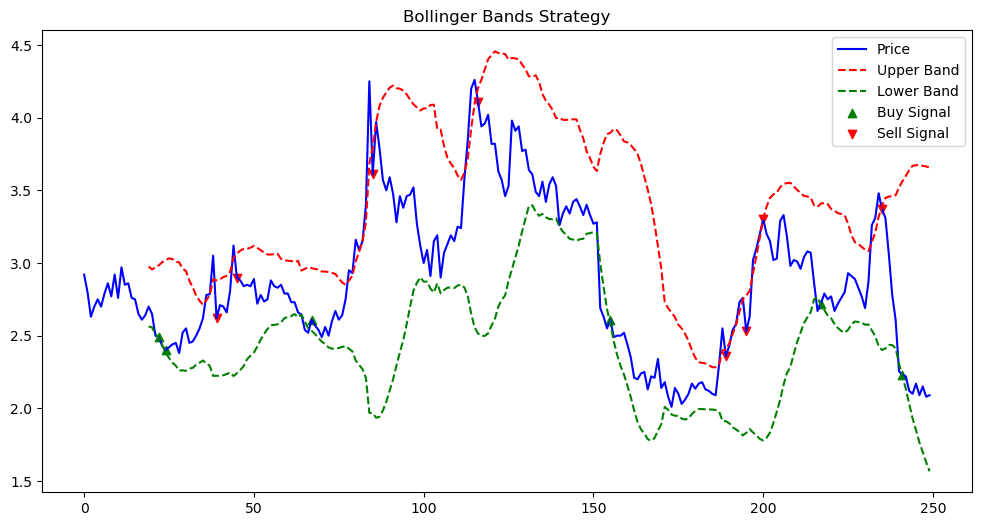

TSLA...
Win Percentage: 88.89%


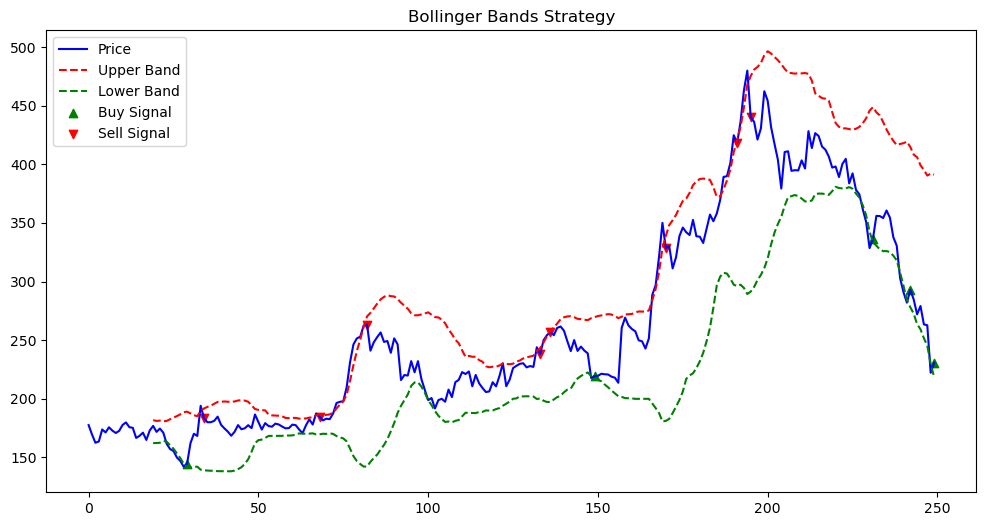

PLTR...
Win Percentage: 77.78%


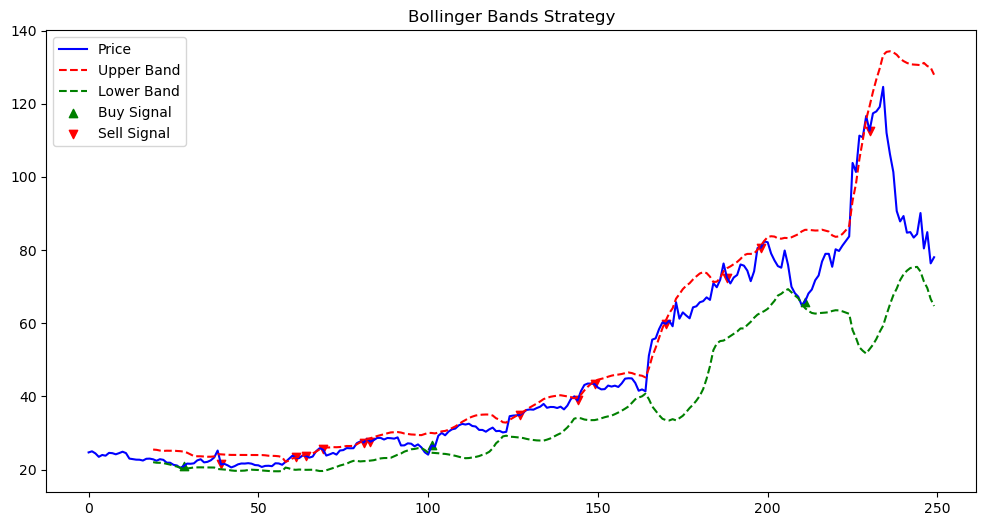

NVDA...
Win Percentage: 100.00%


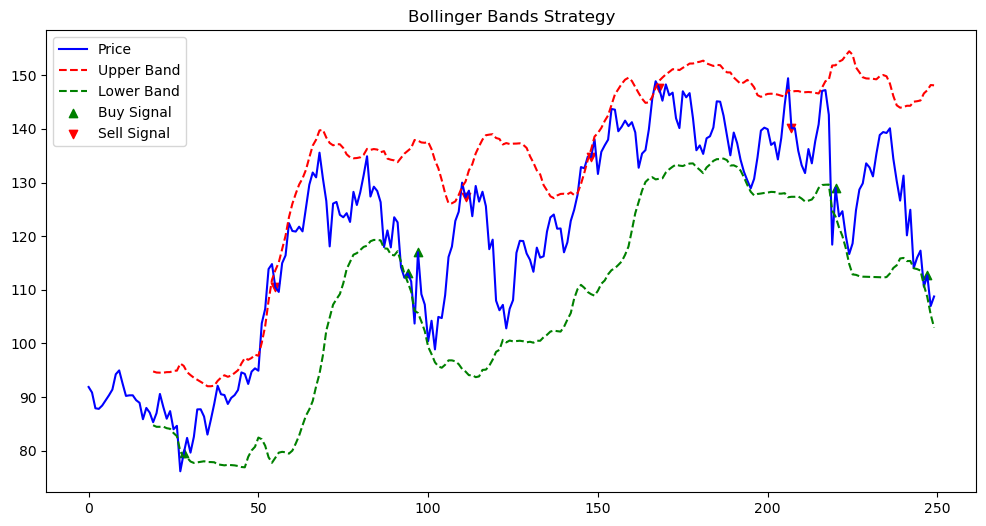

INTC...
Win Percentage: 63.64%


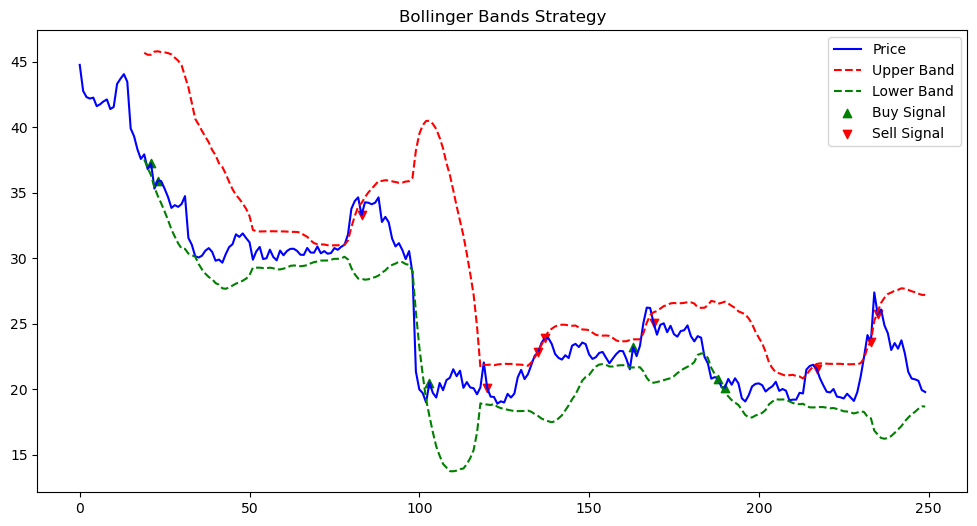

In [27]:
if __name__ == "__main__":
    for ticker in top_5:
        print(f"{ticker}...")
        stock_data = yf.Ticker(ticker).history(period="1y", auto_adjust=True).reset_index(drop=True)
        trader = TradingProfessional(stock_data)
        trader.calculate_bollinger_bands()
        trader.generate_signals()
        trader.backtest_strategy(step=50, start=100)
        trader.visualize_strategy()